In [7]:
import os
import re
import time
import shutil
import hashlib
from tqdm import tqdm
import pandas as pd

# 0. Build utils for this project

In [4]:
def extract_infos(soup):
    infos = []
    try:
        for element in  soup.find(class_="ReactVirtualized__Grid__innerScrollContainer").find_all(class_="sc-eEieub sc-iuDHTM ibJqYc"):
            info = {}

            # get others infomation of new
            tag = element.find("a")    
            info["title"] = tag.attrs["title"]
            info["url"]   = tag.attrs["href"]
            info["intro"] = tag.find(class_="sc-FQuPU sc-ciodno bvnzOw").text

            infos.append(info)
    except:
        print("fail")
        pass
    return pd.DataFrame(infos)

def merge_infos(df_infos, df_infos_current):
    df_infos = pd.concat([df_infos, df_infos_current])
    df_infos = df_infos.drop_duplicates("title")
    df_infos = df_infos.reset_index(drop=True)
    return df_infos

def update_infos(df_infos, soup):
    df_infos_current = extract_infos(soup)
    df_infos = merge_infos(df_infos, df_infos_current)
    return df_infos

def create_folder(path):
    if os.path.exists(path):
        shutil.rmtree(path)
    try:
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)
        
def hash_str(string):
    return hashlib.sha1(string.encode('utf-8')).hexdigest()

# 1. Collect 500+ news from CUPOY
- use selenium for dynamic website

In [3]:
# launch browser in selenium webdriver

from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup

browser = webdriver.Chrome(executable_path='../chromedriver_win32/chromedriver.exe')
browser.get("https://www.cupoy.com/newsfeed/topstory")

In [5]:
df_infos = pd.DataFrame()

while True:
    # Scroll down to the bottom.
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Wait to load the page.
    time.sleep(1)

    # Calculate new scroll height and compare with last scroll height.
    browser.execute_script("return document.body.scrollHeight")
    
    # get infos
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    
    # update infos (remove duplicate information!!)
    df_infos = update_infos(df_infos, soup)
    print(f"update... {len(df_infos)}")
    
    if len(df_infos) > 500:
        print("collected over")
        break
        
browser.quit()

update... 17
update... 19
update... 19
update... 30
update... 44
update... 49
update... 49
update... 60
update... 73
update... 78
update... 78
update... 78
update... 89
update... 102
update... 107
update... 107
update... 118
update... 131
update... 136
update... 136
update... 136
update... 153
update... 158
update... 158
update... 169
update... 183
update... 188
update... 188
update... 199
update... 213
update... 218
update... 218
update... 229
update... 243
update... 248
update... 248
update... 248
update... 259
update... 273
update... 278
update... 278
update... 278
update... 291
update... 295
update... 295
update... 306
update... 320
update... 325
update... 325
update... 325
update... 341
update... 346
update... 346
update... 356
update... 370
update... 374
update... 374
update... 384
update... 396
update... 401
update... 401
update... 411
update... 423
update... 427
update... 427
update... 437
update... 447
update... 449
update... 449
update... 460
update... 473
update... 478
updat

In [6]:
df_infos.head(10)

,title,url,intro
0,《就愛斷捨離》線上看影評：想靠「斷捨離」整理人生，卻為何狠狠傷害了所愛之人？-風傳媒,https://www.storm.mg/lifestyle/2313545,《模犯生》天才少女「小琳」魅力再度征服大銀幕｜《把哥哥退貨可以嗎》廢柴哥哥「桑尼」化身天菜前...
1,武漢肺炎風暴》山東、浙江爆發監獄羣聚感染！司法廳長、監獄長免職，中國病例16連降破功-風傳媒,https://www.storm.mg/article/2317402,中國國家衛健委21日上午公佈武漢肺炎（新冠肺炎）最新數據統計，顯示20日全國除湖北以外地區新...
2,武漢肺炎風暴》中國驚傳「治癒」病例10天後二度感染病毒！-風傳媒,https://www.storm.mg/article/2317847,中國爆發的布武漢肺炎（新冠肺炎）疫情詭譎，《人民日報》21日報導，四川成都一名患者治癒後，回...
3,咳嗽流鼻水1個月，就醫才說曾和檢疫者「聊天」 醫師嘆：宣導還不夠嗎？-風傳媒,https://www.storm.mg/article/2317650,武漢肺炎（新冠肺炎）疫情延燒，臺灣目前已有26例確診病例，如何有效防疫也成為全民關注焦點。不...
4,公主號臺籍旅客下船了！魔術師陳日昇驚險取得檢驗報告 卡關原因曝光-風傳媒,https://www.storm.mg/article/2317594,爆發嚴重武漢肺炎（新冠肺炎）疫情的日籍郵輪「鑽石公主號」近日解除隔離，旅客紛紛開始下船，而臺...
5,武漢肺炎又增兩例 24例的女兒、孫女確診-風傳媒,https://www.storm.mg/article/2317499,中央流行疫情指揮中心今（21）日公佈新增2例武漢肺炎（新冠肺炎，COVID-19）病例，為案...
6,「江子翠」是誰？憑什麼捷運站用他命名？揭祕90％臺灣人都不知道的5個「寶島日常」-風傳媒,https://www.storm.mg/lifestyle/887483,生活中處處可見被大眾「遺忘」的迷思，這類迷思偏向生活中的「冷知識」，不知道並不影響生活，但卻...
7,中研院發現肺腺癌的致命基因，宛如犯罪者聯盟 | TechNews 科技新報,https://technews.tw/2020/02/21/integrative-ana...,肺腺癌患者逐年增加，中央研究院 20 日指出，肺腺癌組織的非編碼核糖核酸「PTTG3P」表現...
8,研究：吸食大麻者更容易產生錯誤記憶 | TechNews 科技新報,https://technews.tw/2020/02/20/cannabis-can-ma...,每個人可能都有過「錯誤記憶」的情況，誤以為自己記憶中是曾經發生過的事，但這種情況可能在一些人...
9,【每 15 分鐘就有一位女性遭性侵】為何即使判性侵犯「絞刑」，仍無法解決印度的社會問題？ |...,https://buzzorange.com/2020/02/21/sexual-assau...,【我們為什麼選擇這篇文章？】 全球的女權意識逐漸上升，但印度的女性權益卻不見成長。印度內政部...


# 2. Extract and save 500+ news
- use requests for static website

In [8]:
import requests

tmp_path = "./tmp"
create_folder(tmp_path)

for index, row in tqdm(df_infos.iterrows(), total=len(df_infos)):
    # check url correct
    r = requests.get(row.url)
    if r.status_code != requests.codes.ok: continue
    
    # extract text from website
    text = str()
    soup = BeautifulSoup(r.text, "html5lib")
    for tag in soup.find_all('p'):
        text += tag.text   
        
    # save as .txt
    ## use hash as file name to avoid filename error
    with open(os.path.join(tmp_path, hash_str(row.title) + ".txt"), 'w', encoding='utf-8') as f:
        f.write(text)
    
    #break

  0%|                                                                                          | 0/503 [00:00<?, ?it/s]

Successfully created the directory ./tmp 


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [07:00<00:00,  1.20it/s]


# 3. Get top-50 keywords for each new
- ignore nonsense words using jieba (ex. 能夠, 建議, 相當, 18, 15, 每個, 顯示, 相關, ...)

In [37]:
import jieba
import jieba.analyse

jieba.analyse.set_stop_words("../data/jieba_TW_stopWord.txt")
jieba.analyse.set_stop_words("./jieba_our_stopWord.txt") # define by myself

In [35]:
keyword_list = []
for txt_name in tqdm(os.listdir(tmp_path)):
    txt_path = os.path.join(tmp_path, txt_name)
    with open(txt_path, 'r', encoding='utf-8') as f:
        text = str()
        for line in f:
            text += line.strip() + ' '
        
        # check if .txt empty
        if len(text) == 0: continue 
            
        # extract only top-50 keywords from each website
        keyword_list += jieba.analyse.extract_tags(text, 
                                                   topK=50, 
                                                   withWeight=False, 
                                                   allowPOS=())

100%|████████████████████████████████████████████████████████████████████████████████| 495/495 [00:05<00:00, 84.67it/s]


# 4. Count all keywords

In [38]:
def count_segment_freq(keyword_list):
    keyword_df = pd.DataFrame(keyword_list, columns=['keyword'])
    keyword_df['count'] = 1
    keyword_freq = keyword_df.groupby('keyword')['count'].sum().sort_values(ascending=False)
    keyword_freq = pd.DataFrame(keyword_freq)
    return keyword_freq

keyword_freq = count_segment_freq(keyword_list)
keyword_freq.head(20)

,count
keyword,
2020,106
台灣,99
中國,82
疫情,73
武漢,71
肺炎,68
美國,55
網站,52
報導,49


# 5. Visualization of wordcloud

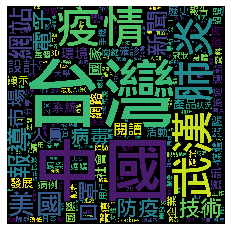

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text = ' '.join(keyword_list) 
wc = WordCloud(collocations=False, 
               font_path='C:\Windows\Fonts\msjhbd.ttc', 
               width=1400, 
               height=1400, 
               margin=2).generate(text)
wc.to_file('./wordgloud.png')
plt.imshow(wc)
plt.axis("off")
plt.show()